In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/BUTDA

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1teU1fhQEGKPyFVwfNFHLsTVUuRRtVyp7/AML_project/BUTPA


# Visual Question Answering

Visual Question Answering is the computer vision task in which a model is able to output natural language responses to natural language questions about images in input.

We based our research project on the papers **“Bottom-Up and Top-Down Attention for Image Captioning and Visual Question Answering”** and **“Tips and Tricks for Visual Question Answering: Learnings from the 2017 Challenge”**. 

The baseline code used has been an efficient PyTorch implementation of the winning entry of the 2017 VQA Challenge (available at the link: https://github.com/hengyuan-hu/bottom-up-attention-vqa)
translated by us to *Python 3* and a newer version of *Pytorch*.


<a href="https://imgur.com/qiW1R7U"><img src="https://i.imgur.com/qiW1R7U.png" title="base model"/></a>

This above is the architecture of the baseline model from the papers, we analyzed and changed it.



In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py

from dataset import Dictionary, VQAFeatureDataset
import base_model
from train import train
from utils import attention_analysis, reasoning_analysis

seed = 1111
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
np.random.seed(seed)
random.seed(seed)

In [ ]:
# some useful hyperparameters

batch_size = 512
epochs = 10
num_hid = 1024
output_path = "saved_models/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# load dictionary, dataset and dataloaders

dictionary = Dictionary.load_from_file("data/dictionary.pkl")
train_dset = VQAFeatureDataset("train", dictionary) # 82783 images - COCO train2014
eval_dset = VQAFeatureDataset("val", dictionary) # 40504 images - COCO val2014

train_loader = DataLoader(train_dset, batch_size, shuffle=True, num_workers=4)
eval_loader = DataLoader(eval_dset, batch_size, shuffle=False, num_workers=4)

loading dictionary from data/dictionary.pkl
Loading features from h5 file
Loading features from h5 file


## Question Embedding

Here we want to experiment with different networks to produce the embedding of the question, which is a latent vector that represents the meaning of the question. It is produced by sequentially combining the single word embeddings.

Starting training...


epoch 0, time: 153.08
	train_loss: 10.03, score: 39.01
	eval score: 50.15 (92.66)


epoch 1, time: 160.49
	train_loss: 3.97, score: 52.07
	eval score: 55.28 (92.66)


epoch 2, time: 149.16
	train_loss: 3.61, score: 56.87
	eval score: 58.08 (92.66)


epoch 3, time: 141.40
	train_loss: 3.40, score: 59.97
	eval score: 59.68 (92.66)


epoch 4, time: 146.81
	train_loss: 3.25, score: 62.21
	eval score: 60.84 (92.66)


epoch 5, time: 138.11
	train_loss: 3.12, score: 64.19
	eval score: 61.60 (92.66)


epoch 6, time: 139.20
	train_loss: 3.01, score: 65.90
	eval score: 62.11 (92.66)


epoch 7, time: 138.93
	train_loss: 2.92, score: 67.51
	eval score: 62.46 (92.66)


epoch 8, time: 146.82
	train_loss: 2.83, score: 68.95
	eval score: 62.46 (92.66)


epoch 9, time: 137.59
	train_loss: 2.75, score: 70.35
	eval score: 62.70 (92.66)


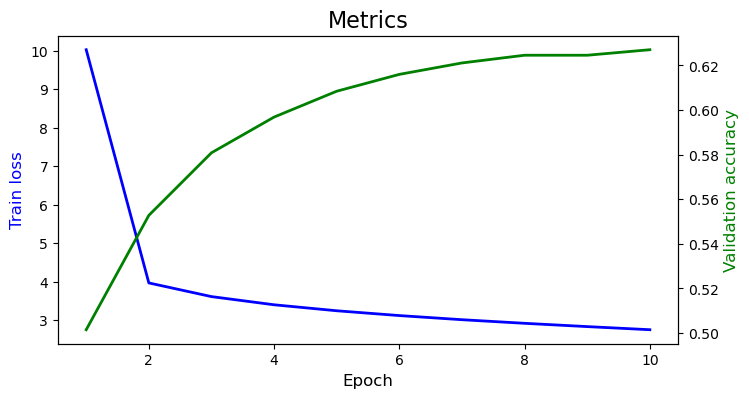

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="GRU").to(device) # baseline
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"baseline")

Starting training...


epoch 0, time: 156.90
	train_loss: 11.01, score: 37.35
	eval score: 48.50 (92.66)


epoch 1, time: 152.91
	train_loss: 4.06, score: 50.95
	eval score: 54.33 (92.66)


epoch 2, time: 152.44
	train_loss: 3.67, score: 55.78
	eval score: 57.47 (92.66)


epoch 3, time: 148.95
	train_loss: 3.44, score: 59.13
	eval score: 58.92 (92.66)


epoch 4, time: 161.51
	train_loss: 3.28, score: 61.58
	eval score: 60.06 (92.66)


epoch 5, time: 153.14
	train_loss: 3.15, score: 63.58
	eval score: 61.06 (92.66)


epoch 6, time: 174.95
	train_loss: 3.04, score: 65.38
	eval score: 61.87 (92.66)


epoch 7, time: 161.81
	train_loss: 2.95, score: 66.90
	eval score: 62.24 (92.66)


epoch 8, time: 153.01
	train_loss: 2.86, score: 68.45
	eval score: 62.61 (92.66)


epoch 9, time: 181.10
	train_loss: 2.78, score: 69.86
	eval score: 62.77 (92.66)


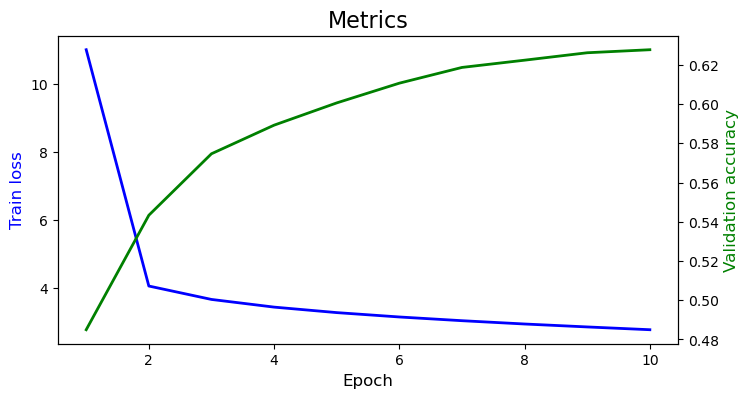

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="LSTM").to(device) # LSTM
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"LSTM")

Starting training...


epoch 0, time: 179.10
	train_loss: 9.54, score: 39.79
	eval score: 50.56 (92.66)


epoch 1, time: 174.47
	train_loss: 3.94, score: 52.55
	eval score: 55.56 (92.66)


epoch 2, time: 156.77
	train_loss: 3.59, score: 57.14
	eval score: 58.33 (92.66)


epoch 3, time: 185.61
	train_loss: 3.38, score: 60.20
	eval score: 59.87 (92.66)


epoch 4, time: 185.31
	train_loss: 3.23, score: 62.55
	eval score: 61.05 (92.66)


epoch 5, time: 153.12
	train_loss: 3.10, score: 64.54
	eval score: 61.87 (92.66)


epoch 6, time: 168.44
	train_loss: 2.99, score: 66.31
	eval score: 62.21 (92.66)


epoch 7, time: 160.78
	train_loss: 2.89, score: 67.88
	eval score: 62.50 (92.66)


epoch 8, time: 153.06
	train_loss: 2.81, score: 69.39
	eval score: 63.02 (92.66)


epoch 9, time: 160.43
	train_loss: 2.72, score: 70.90
	eval score: 63.14 (92.66)


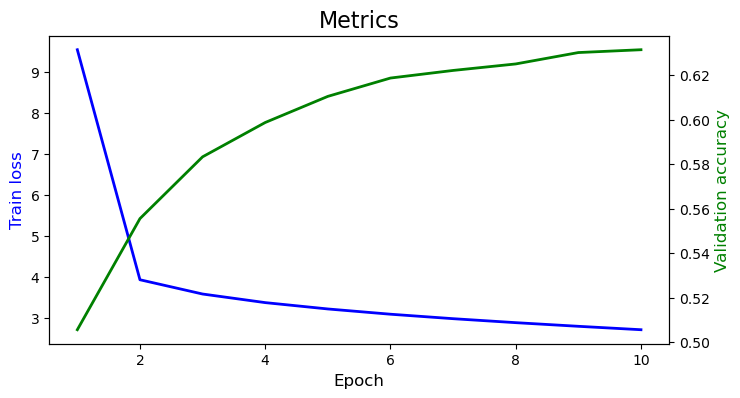

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU").to(device) # BiGRU
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"BiGRU")

Starting training...


epoch 0, time: 194.31
	train_loss: 9.98, score: 39.08
	eval score: 48.92 (92.66)


epoch 1, time: 190.04
	train_loss: 4.01, score: 51.59
	eval score: 54.17 (92.66)


epoch 2, time: 186.38
	train_loss: 3.64, score: 56.12
	eval score: 57.58 (92.66)


epoch 3, time: 179.51
	train_loss: 3.43, score: 59.29
	eval score: 59.29 (92.66)


epoch 4, time: 213.36
	train_loss: 3.27, score: 61.62
	eval score: 60.25 (92.66)


epoch 5, time: 176.27
	train_loss: 3.14, score: 63.60
	eval score: 60.96 (92.66)


epoch 6, time: 178.44
	train_loss: 3.03, score: 65.39
	eval score: 61.86 (92.66)


epoch 7, time: 183.74
	train_loss: 2.94, score: 67.01
	eval score: 62.24 (92.66)


epoch 8, time: 173.03
	train_loss: 2.85, score: 68.52
	eval score: 62.45 (92.66)


epoch 9, time: 183.74
	train_loss: 2.77, score: 69.94
	eval score: 62.74 (92.66)


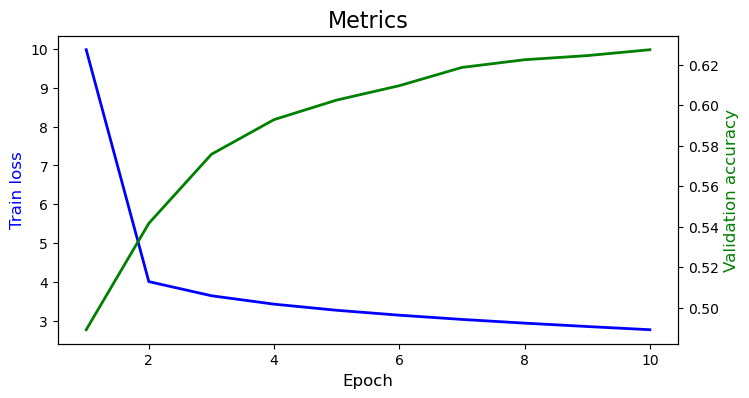

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="LSTM").to(device) # BiLSTM
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"BiLSTM")

Starting training...


epoch 0, time: 211.32
	train_loss: 8.82, score: 40.44
	eval score: 51.73 (92.66)


epoch 1, time: 202.29
	train_loss: 3.82, score: 54.00
	eval score: 56.80 (92.66)


epoch 2, time: 204.22
	train_loss: 3.48, score: 58.82
	eval score: 58.85 (92.66)


epoch 3, time: 198.42
	train_loss: 3.26, score: 61.99
	eval score: 60.75 (92.66)


epoch 4, time: 188.17
	train_loss: 3.10, score: 64.37
	eval score: 61.95 (92.66)


epoch 5, time: 195.63
	train_loss: 2.97, score: 66.54
	eval score: 61.96 (92.66)


epoch 6, time: 194.90
	train_loss: 2.85, score: 68.41
	eval score: 62.89 (92.66)


epoch 7, time: 187.99
	train_loss: 2.75, score: 70.19
	eval score: 63.16 (92.66)


epoch 8, time: 199.09
	train_loss: 2.65, score: 71.81
	eval score: 63.45 (92.66)


epoch 9, time: 202.06
	train_loss: 2.56, score: 73.38
	eval score: 63.70 (92.66)


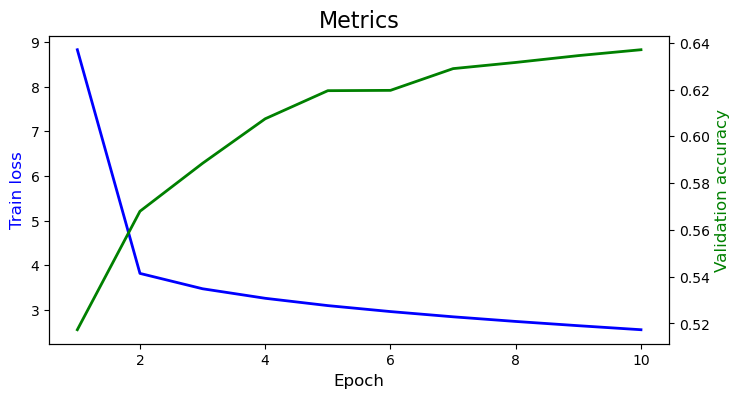

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU").to(device) # BiGRU + double the parameters
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"BiGRU2p")

Starting training...


epoch 0, time: 248.96
	train_loss: 9.39, score: 38.69
	eval score: 49.95 (92.66)


epoch 1, time: 230.04
	train_loss: 3.92, score: 52.45
	eval score: 55.41 (92.66)


epoch 2, time: 227.74
	train_loss: 3.55, score: 57.41
	eval score: 57.63 (92.66)


epoch 3, time: 231.68
	train_loss: 3.32, score: 60.79
	eval score: 60.29 (92.66)


epoch 4, time: 224.25
	train_loss: 3.15, score: 63.40
	eval score: 61.31 (92.66)


epoch 5, time: 226.67
	train_loss: 3.01, score: 65.67
	eval score: 62.12 (92.66)


epoch 6, time: 237.91
	train_loss: 2.90, score: 67.59
	eval score: 62.66 (92.66)


epoch 7, time: 225.71
	train_loss: 2.79, score: 69.45
	eval score: 62.93 (92.66)


epoch 8, time: 225.11
	train_loss: 2.69, score: 71.14
	eval score: 63.29 (92.66)


epoch 9, time: 220.08
	train_loss: 2.60, score: 72.78
	eval score: 63.41 (92.66)


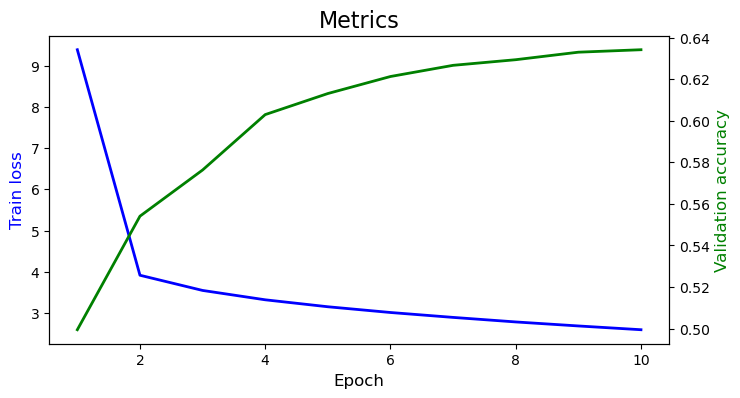

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="LSTM").to(device) # BiLSTM + double the parameters
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"BiLSTM2p")

Starting training...


  0%|          | 0/867 [00:00<?, ?it/s]/home/alessio/anaconda3/lib/python3.9/site-packages/torch/nn/modules/conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755849709/work/aten/src/ATen/native/Convolution.cpp:744.)
  return F.conv2d(input, weight, bias, self.stride,


epoch 0, time: 1556.69
	train_loss: 9.88, score: 38.10
	eval score: 46.87 (92.66)


epoch 1, time: 1513.54
	train_loss: 4.28, score: 48.57
	eval score: 51.37 (92.66)


epoch 2, time: 1473.45
	train_loss: 3.95, score: 52.19
	eval score: 53.71 (92.66)


epoch 3, time: 1436.97
	train_loss: 3.75, score: 54.50
	eval score: 55.20 (92.66)


epoch 4, time: 1395.65
	train_loss: 3.60, score: 56.43
	eval score: 56.58 (92.66)


epoch 5, time: 1394.31
	train_loss: 3.49, score: 58.07
	eval score: 57.26 (92.66)


epoch 6, time: 1393.63
	train_loss: 3.39, score: 59.48
	eval score: 57.41 (92.66)


epoch 7, time: 1394.83
	train_loss: 3.31, score: 60.66
	eval score: 58.52 (92.66)


epoch 8, time: 1394.44
	train_loss: 3.24, score: 61.88
	eval score: 58.79 (92.66)


epoch 9, time: 1393.49
	train_loss: 3.17, score: 62.87
	eval score: 58.87 (92.66)


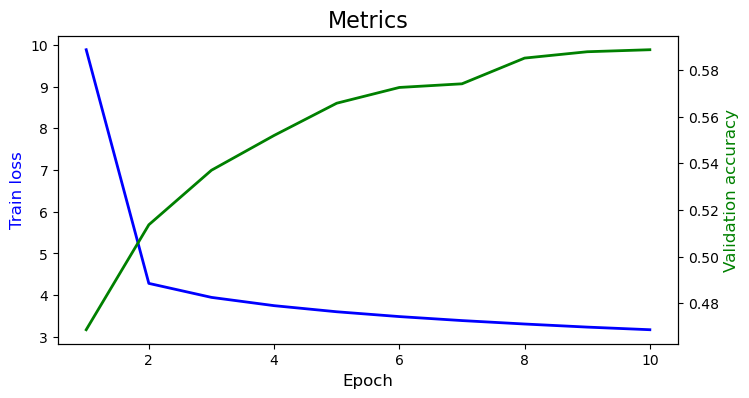

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="TCN").to(device) # TCN
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"TCN")

![](https://i.imgur.com/0QBDRK4.png)

## Different activation functions and gradient flow
In order to correctly learn, the model needs a good gradient flow throughout all the network layers. First of all we notice that gradients have high variance, and especially for some layers, the maximum value is much higher than the mean:

<img src="https://i.imgur.com/F5Tzhnc.png" alt="drawing" width="800"/>

So we clipped the norm of the gradients, and this will prevent exploding gradients:

<img src="https://i.imgur.com/4Zji3pJ.png" alt="drawing" width="800"/>

Now let's see how different activation functions affect the gradient flow of the network, to check if there is some vanishing gradient.

Starting training...


epoch 0, time: 226.00
	train_loss: 8.55, score: 40.42
	eval score: 51.43 (92.66)


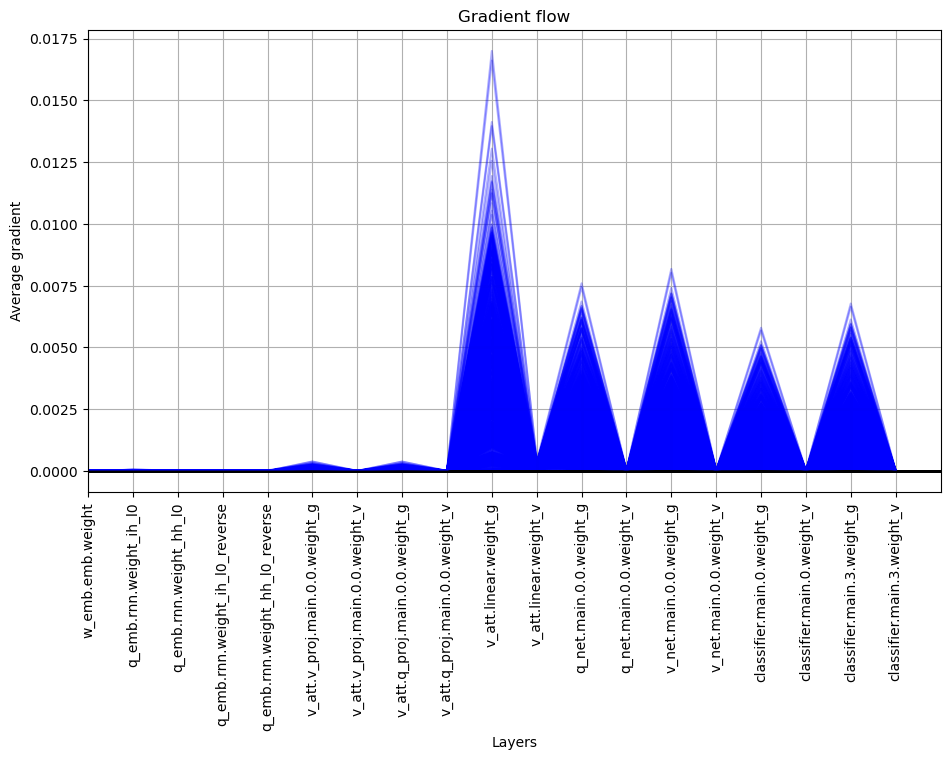

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU").to(device) # best model so far w ReLU
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"grad", grad_analysis=True)

Starting training...


epoch 0, time: 216.11
	train_loss: 10.97, score: 23.94
	eval score: 24.28 (92.66)


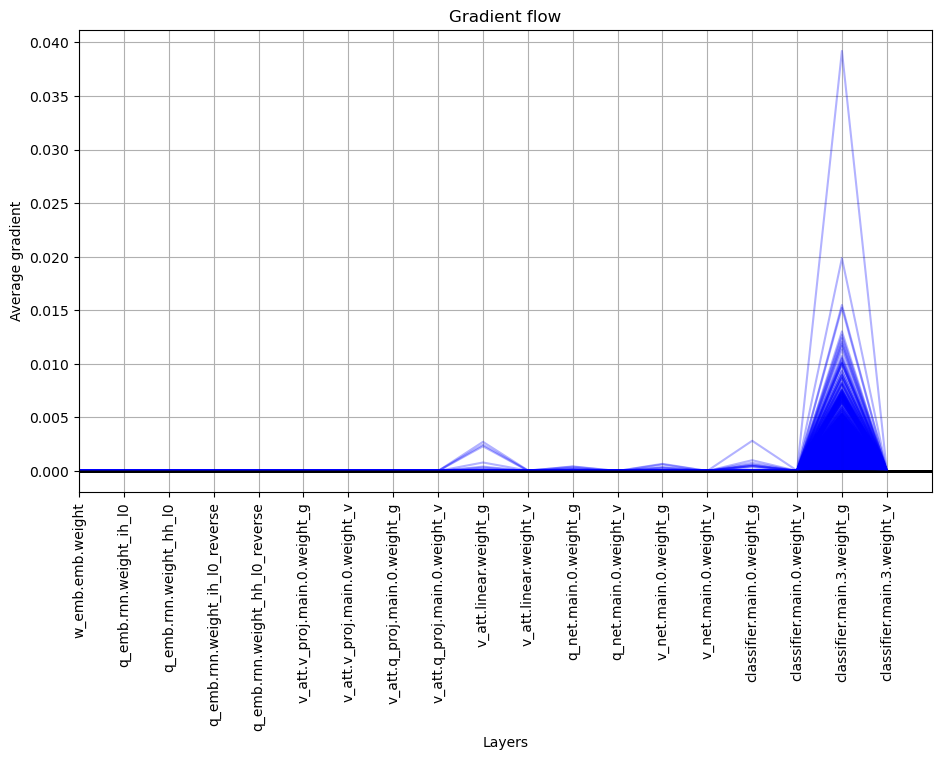

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU", activation=nn.Sigmoid).to(device) # best model so far w Sigmoid
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"grad", grad_analysis=True)

Starting training...


epoch 0, time: 213.48
	train_loss: 8.72, score: 41.21
	eval score: 51.89 (92.66)


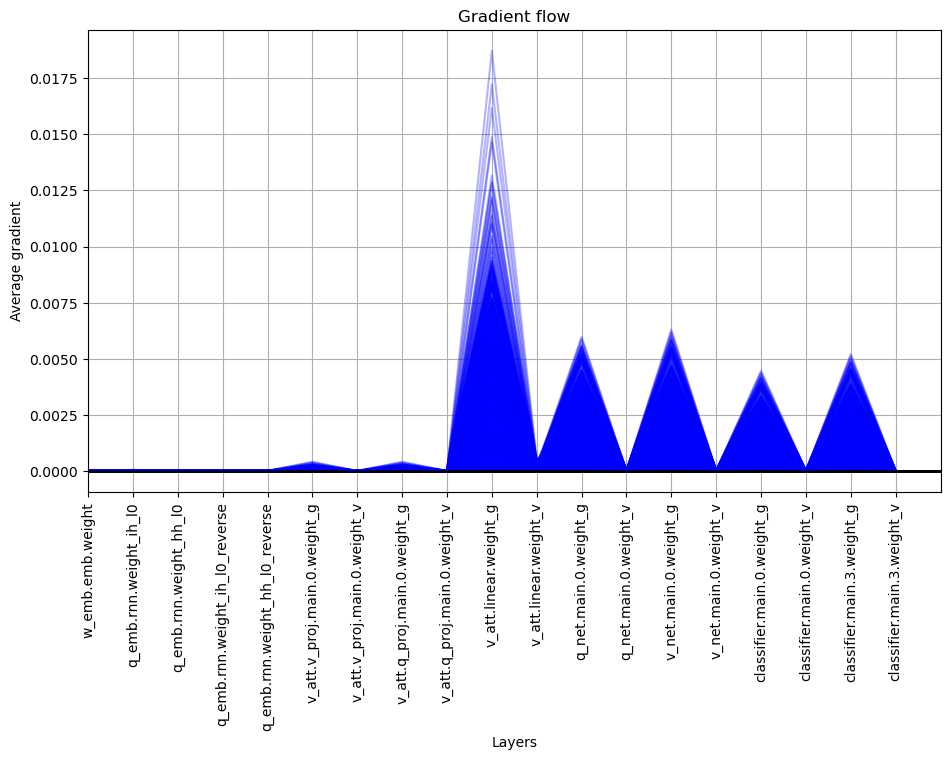

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU", activation=nn.LeakyReLU).to(device) # best model so far w LeakyReLU
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"grad", grad_analysis=True)

Starting training...


epoch 0, time: 215.49
	train_loss: 9.61, score: 42.34
	eval score: 52.03 (92.66)


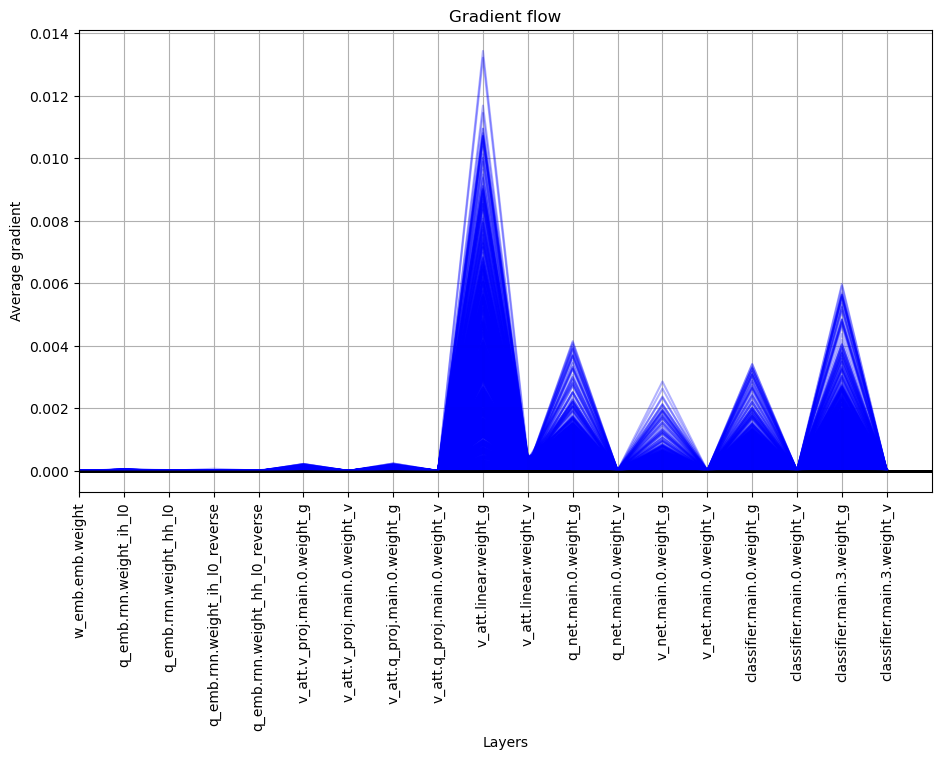

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU", activation=nn.ELU).to(device) # best model so far w ELU
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"grad", grad_analysis=True)

Starting training...


epoch 0, time: 223.20
	train_loss: 48.52, score: 42.95
	eval score: 52.44 (92.66)


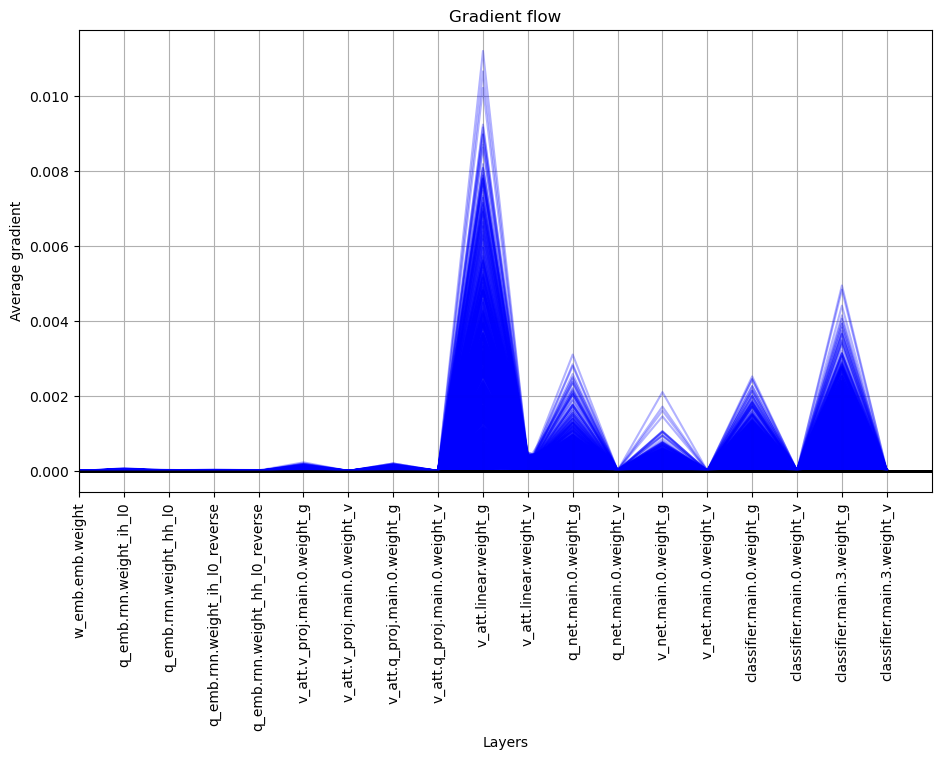

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU", activation=nn.SELU).to(device) # best model so far w SELU
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"grad", grad_analysis=True)

With the Sigmoid gradients are vanishing, while the ReLU is behaving much better. With LeakyReLU, ELU and SELU gradient flow and performances are very similar to ReLU.

## RNN's weight initialization

Actually TensorFlow uses a different weight initialization wrt to PyTorch, and people online are claiming that TensorFlow initialization is better.

![](https://i.imgur.com/UtLbOyo.png)

Starting training...


epoch 0, time: 151.24
	train_loss: 9.47, score: 40.28
	eval score: 51.14 (92.66)


epoch 1, time: 179.24
	train_loss: 3.92, score: 52.85
	eval score: 55.99 (92.66)


epoch 2, time: 154.38
	train_loss: 3.58, score: 57.43
	eval score: 58.28 (92.66)


epoch 3, time: 146.61
	train_loss: 3.37, score: 60.39
	eval score: 59.79 (92.66)


epoch 4, time: 147.48
	train_loss: 3.22, score: 62.69
	eval score: 61.16 (92.66)


epoch 5, time: 157.04
	train_loss: 3.10, score: 64.55
	eval score: 61.74 (92.66)


epoch 6, time: 178.86
	train_loss: 2.99, score: 66.36
	eval score: 62.28 (92.66)


epoch 7, time: 163.18
	train_loss: 2.90, score: 67.86
	eval score: 62.63 (92.66)


epoch 8, time: 178.26
	train_loss: 2.81, score: 69.33
	eval score: 62.92 (92.66)


epoch 9, time: 180.43
	train_loss: 2.74, score: 70.66
	eval score: 63.09 (92.66)


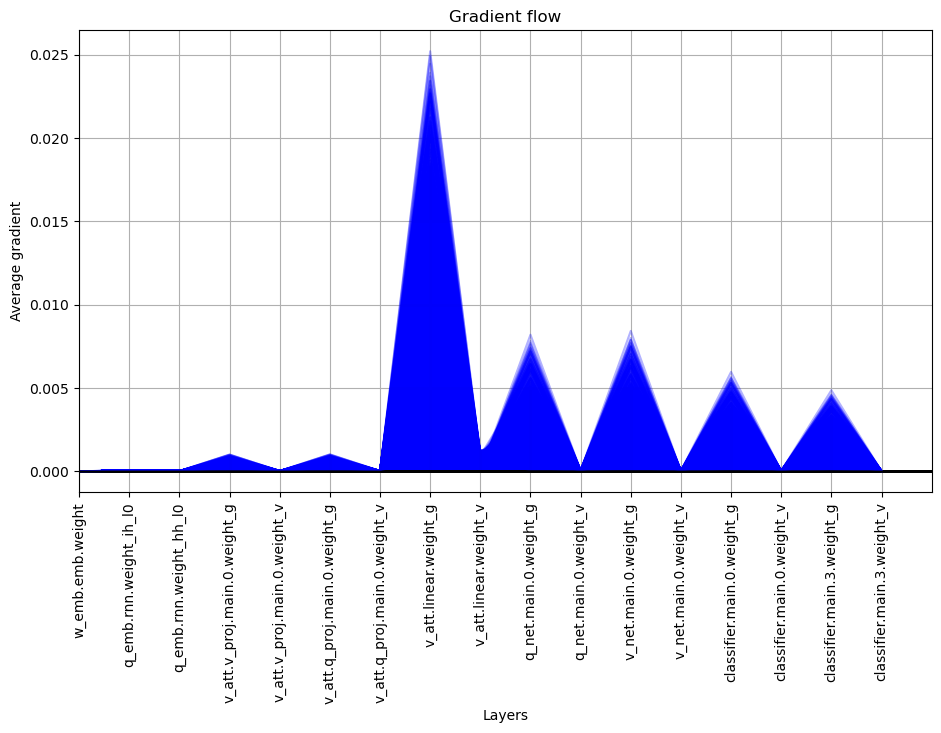

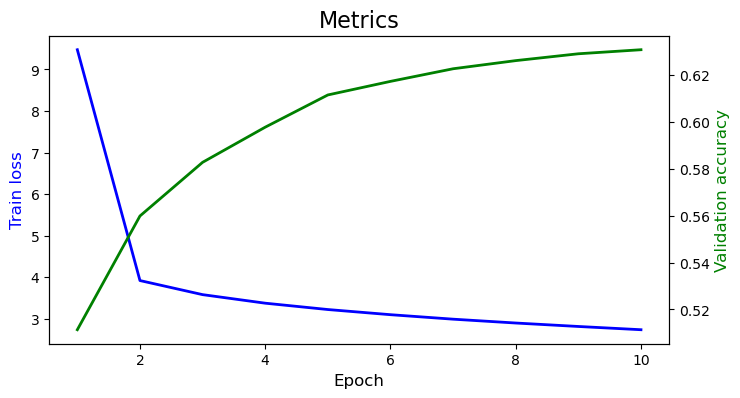

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="GRU", rnn_init=True).to(device) # baseline with new initialization
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"GRUinit", grad_analysis=True)

Starting training...


epoch 0, time: 158.63
	train_loss: 8.76, score: 39.00
	eval score: 50.04 (92.66)


epoch 1, time: 162.73
	train_loss: 3.98, score: 51.80
	eval score: 54.48 (92.66)


epoch 2, time: 162.62
	train_loss: 3.62, score: 56.36
	eval score: 57.63 (92.66)


epoch 3, time: 169.82
	train_loss: 3.41, score: 59.60
	eval score: 59.31 (92.66)


epoch 4, time: 173.83
	train_loss: 3.25, score: 61.97
	eval score: 60.59 (92.66)


epoch 5, time: 159.31
	train_loss: 3.12, score: 64.09
	eval score: 61.41 (92.66)


epoch 6, time: 177.21
	train_loss: 3.01, score: 65.82
	eval score: 62.07 (92.66)


epoch 7, time: 182.35
	train_loss: 2.91, score: 67.42
	eval score: 62.38 (92.66)


epoch 8, time: 175.84
	train_loss: 2.83, score: 68.93
	eval score: 62.84 (92.66)


epoch 9, time: 169.56
	train_loss: 2.74, score: 70.41
	eval score: 62.99 (92.66)


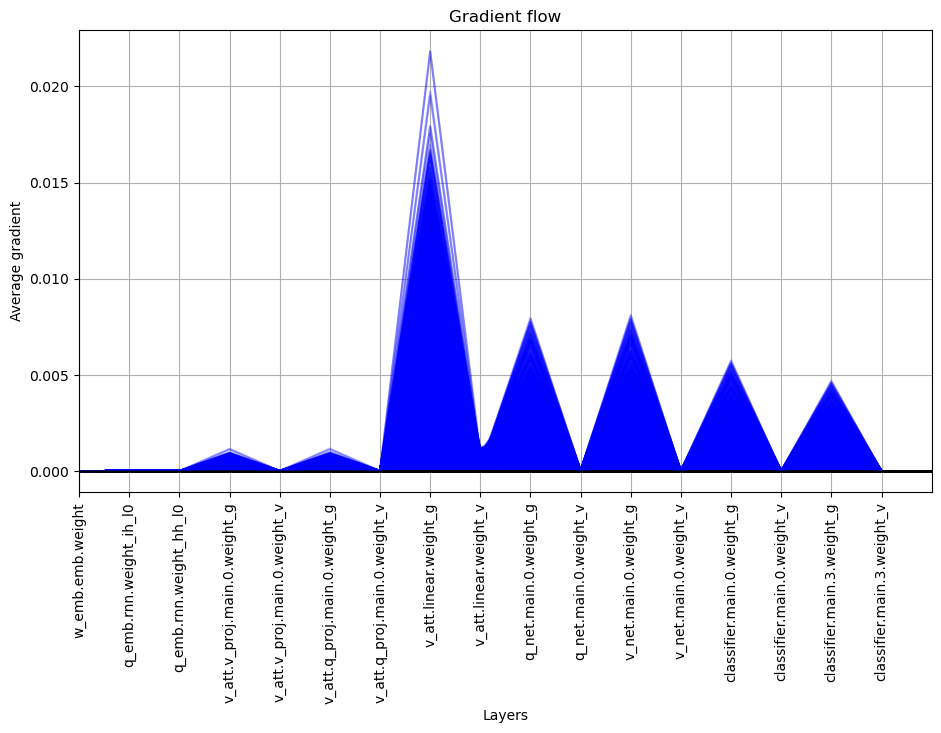

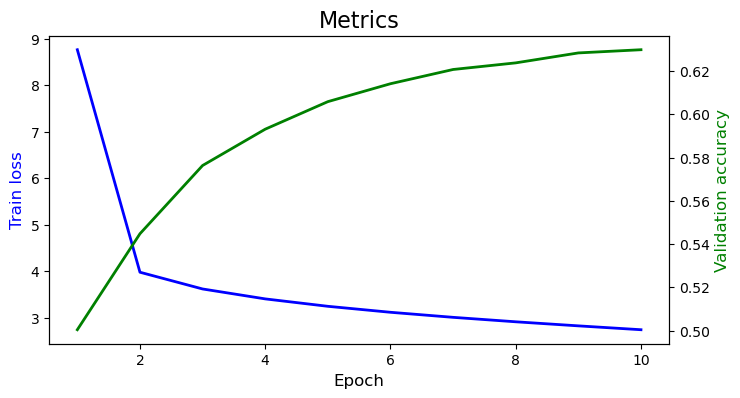

In [ ]:
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="LSTM", rnn_init=True).to(device) # LSTM with new initialization
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, epochs, output_path+"LSTMinit", grad_analysis=True)

With TF initialization we obtained **+0.39** accuracy on the GRU model and **+0.22** on the LSTM one.

## ReLU neurons initialization and data variance

A good network should preserve the variance of the data even after many layers, let's see here how the deep ReLU networks are behaving.

Starting training...


  0%|          | 0/867 [00:00<?, ?it/s]

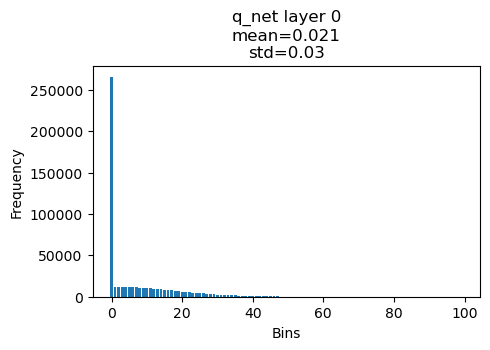

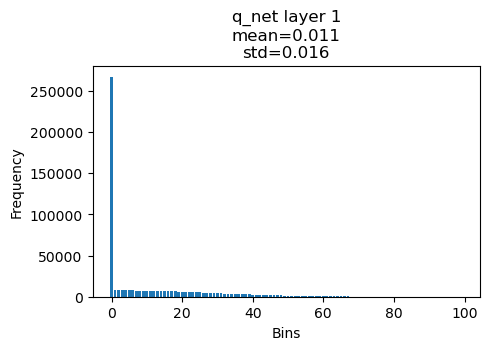

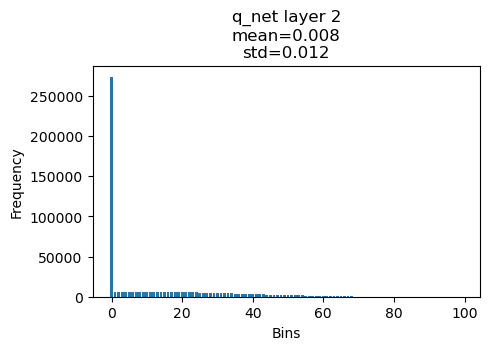

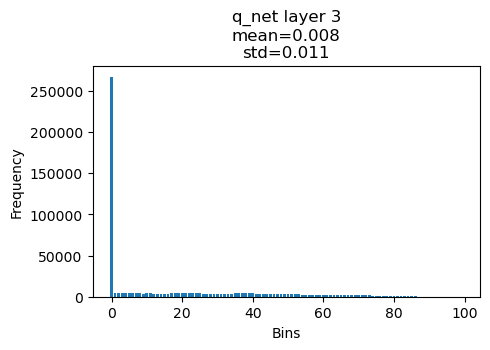

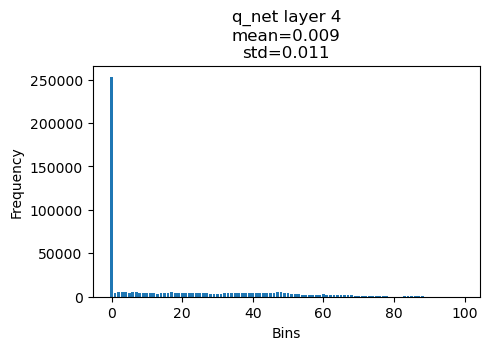

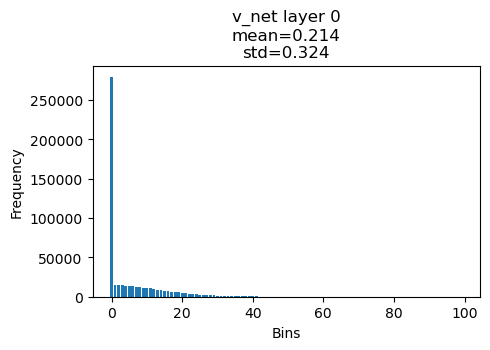

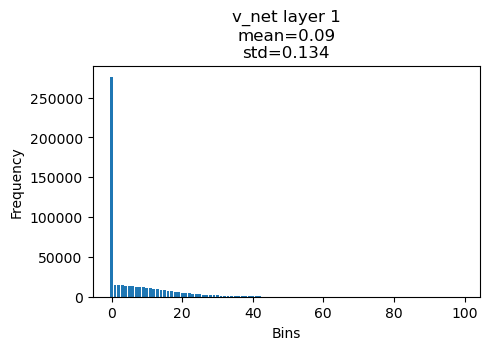

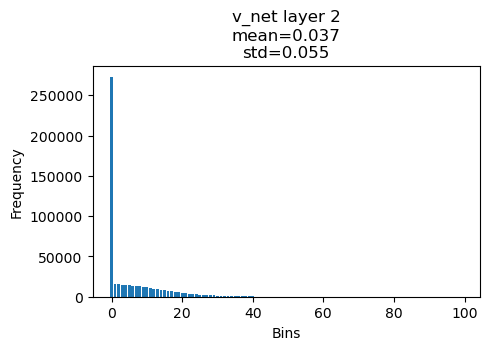

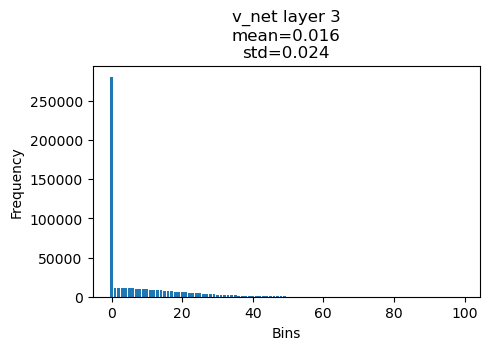

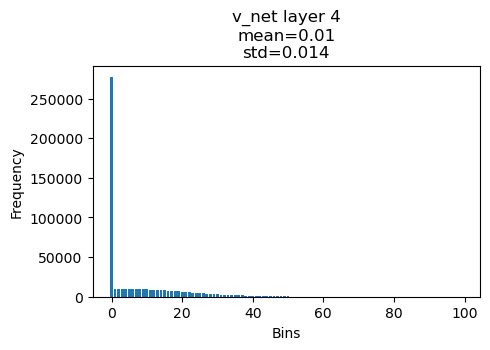

In [ ]:
# checking data variance of FC layers with default relu init (torch.nn.init.kaiming_uniform_)
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="GRU", var_analysis=True).to(device) 
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"GRUvar", var_analysis=True)

Starting training...


  0%|          | 0/867 [00:00<?, ?it/s]

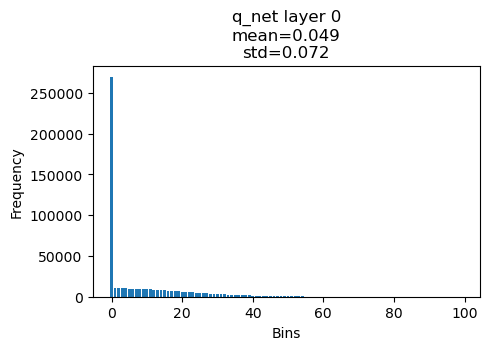

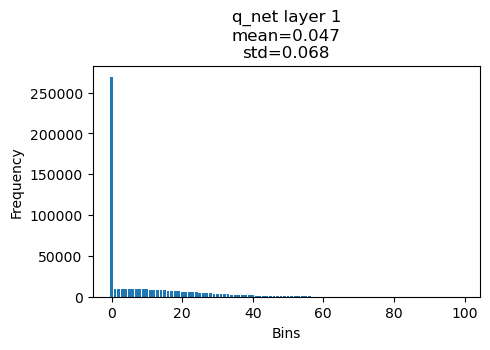

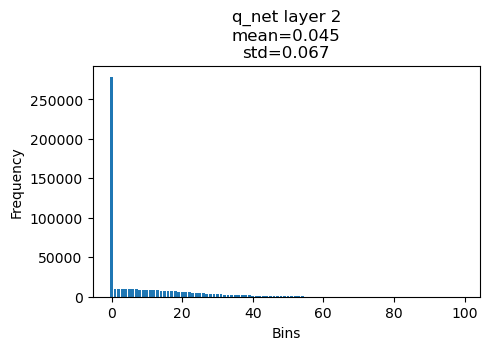

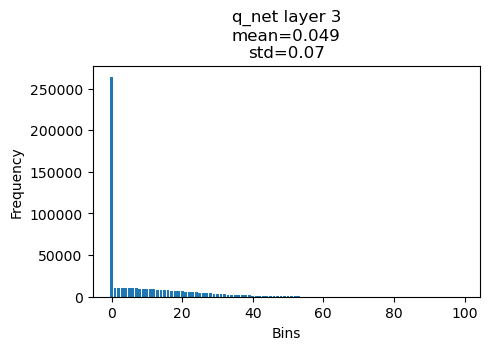

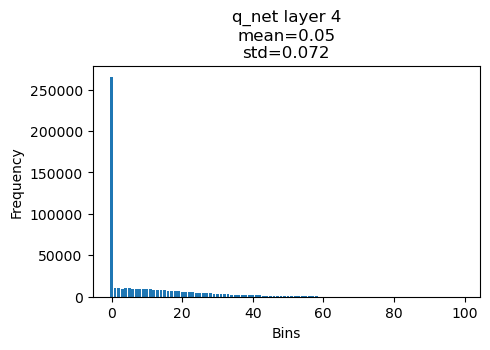

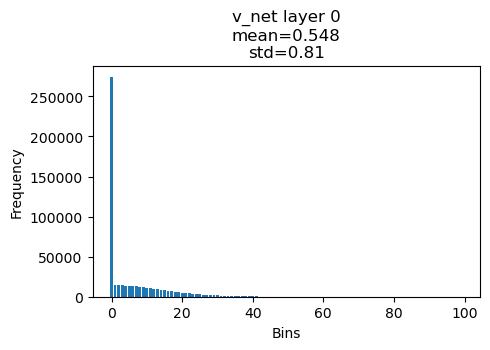

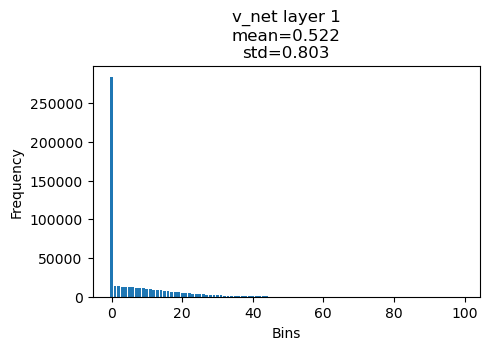

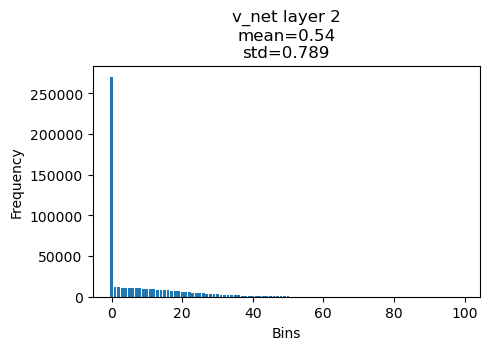

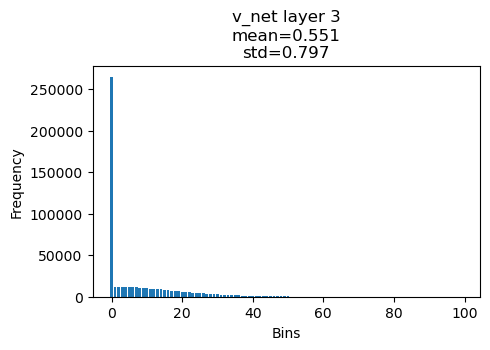

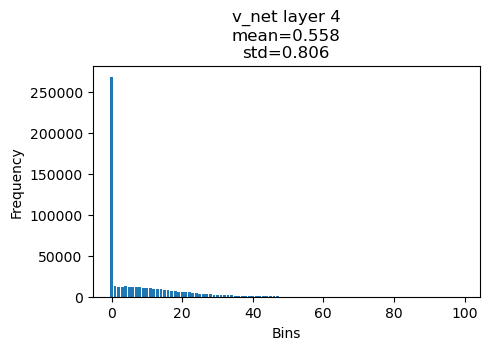

In [ ]:
# checking data variance of FC layers with our relu init (torch.nn.init.kaiming_normal_)
model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=False, rnn_type="GRU", relu_init=True, var_analysis=True).to(device) 
model.w_emb.init_embedding("data/glove6b_init_300d.npy")
train(model, train_loader, eval_loader, 1, output_path+"GRUvar", var_analysis=True)

It turns out that default PyTorch initialization for linear layers, which is based on a Kaiming initialization sampled from a uniform distribution, doesn't preserve data variance, which is quite surprising and counterintuitive! Our initialization is a Kaiming initialization sampled from a gaussian distribution, and it is preserving the variance very well. However, using more than 1 linear layer in our ReLU networks didn't bring any improvement, so we remained with 1 ReLU layer (but still, even for future modifications, an initialization that preserves variance is better!).
<hr />

# **Word Embedding with DistilBERT**

Another step that has been done refers to replacing the Word Embedding baseline architecture with a DistilBERT transformer model, which runs 60% faster while preserving over 95% of BERT’s performances. 

The model structure becomes this below:

<a href="https://imgur.com/LlopiQ4"><img src="https://i.imgur.com/LlopiQ4.png" title="distilbert model"/></a>

We tested several versions of DistilBERT, starting from differentiating between the freezed-out one (so with locked weights) and the fined-tuned one. 

We then discovered one of the "Darkest secrets of BERT", which is catastrophic forgetting. 

The latter brought us to make deeper researches on the learning rates (Learning Rate Test), until finding the best one to train the model with. 


### **Freezed out DistilBERT**

To freeze the model we de-commented the sections of the BERT Embedding layer that allows us to do it.  

2022-12-14 09:57:56.751860: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you

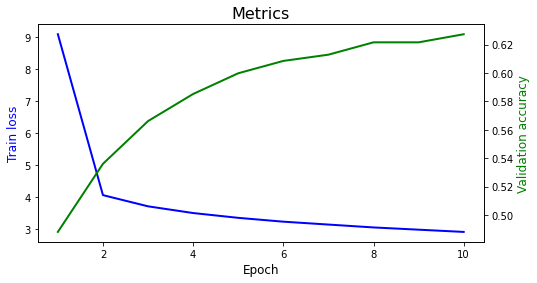

In [ ]:
!python main.py --emb_size 768 --bert True # freezed DistilBERT

### **Fine-tuned DistilBERT with default hyperparameters**

The default learning rate for the Adamax Optimizer is *2e-3*, which then came out as too high for training BERT models.
We trained the model for 7 epochs and then stopped because it wasn't improving.

In [ ]:
!python main.py --emb_size 768 --bert True # DistilBERT fine tuned

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).

-------Distilbert Training--------

Started training...
Epoch: 0
epoch 0, time: 2787.97
	train_loss: 13.57 , score: 24.18
	eval score: 24.98 (92.66)
Epoch: 1
epoch 

<a  href="https://imgur.com/Pekb7Ws"><img src="https://i.imgur.com/Pekb7Ws.png" title="distilbert model"/></a>

### **Catastrophic forgetting problem: fine-tuned DistilBERT with lower learning rates**

We discovered that our BERT model suffered from the catastrophic forgetting problem while training. 

We took as reference the paper: **"How to Fine-Tune BERT for Text Classification?"** by Shanghai Key Laboratory of Intelligent Information Processing, Fudan University School of Computer Science
(available at this link: https://arxiv.org/pdf/1905.05583.pdf) which attributes the fault to too high learning rates. 

We then decided to test the model with the suggested lr for BERT text classification models (2e-5) to see if it could improve the performances and it eventually did. 

In [ ]:
!python main.py # DistilBERT fine-tuned with 2e-5 lr

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).

-------Distilbert Training--------

Started training...
Epoch:  0
epoch 0, time: 3096.11
	train_loss: 173.40, score: 21.15
	eval score: 31.40 (92.66)
Epoch:  1
epoc

<a  href="https://imgur.com/Lin6FnU"><img src="https://i.imgur.com/Lin6FnU.png" title="distilbert model"/></a>

Training with the same amount of epochs the models with DistilBERT's word embedding having different learning rates really made the difference. This plot clearly shows how impactful is the size of this hyperparameter for the performance of the pre-trained model. 

<a  href="https://imgur.com/C1uBpPn"><img src="https://i.imgur.com/C1uBpPn.png" title="distilbert model"/></a>

#### **Learning Rate Test**

The basic idea is that we wanted to efficiently find the maximum learning rate we could use which would improve the VQA accuracy. In order to find that value, we trained many times for one epoch, each epoch with a different learning rate and we saw how the loss and accuracy changed.

We then plotted the VQA accuracy, and saw where the it started to improve, and when it started to get worse/plateau/to become ragged.

We choose the learning rate which coincided to the higher accuracy.

In [ ]:
!python main.py --emb_size 768 --bert True # and more experiments with same syntax, omitted for shortness 

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).

-------Distilbert Training--------

Started training with lr =  6e-05
Epoch:  0
epoch 0, time: 2853.13
	train_loss: 66.43, score: 26.47
	eval score: 37.07 (92.66)



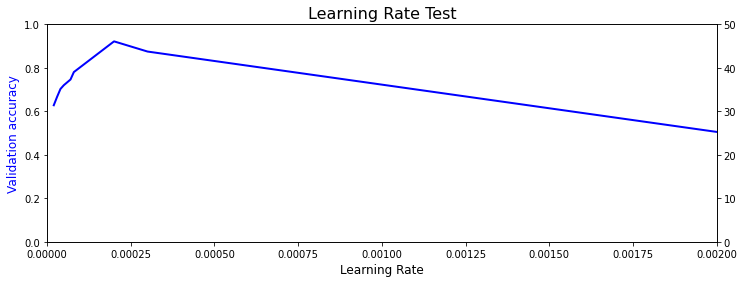

In [ ]:
# here I manually collected the values of 10 experiments and plotted them

val_acc= [31.40, 33.35, 35.15, 36.01, 37.32, 39.03, 46.09, 43.75, 25.27, 24.35]
train_loss= [173.40, 116.86, 92.21, 79.30, 58.19,  52.50, 26.41, 20.55, 13.33, 10.84]
learning_rates = [2e-5, 3e-5, 4e-5, 5e-5, 7e-5, 8e-5, 2e-4, 3e-4, 2e-3, 1e-2]


def plot_lr(train_loss, val_acc, learning_rates):
    title_fontsize = 16
    norm_fontsize = 12

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.set_title("Learning Rate Test", fontdict={"fontsize": title_fontsize})  # set plot title
    ax2 = ax1.twinx()

    ax2.plot(learning_rates, val_acc, "b", linewidth=2)

    ax1.set_xlabel("Learning Rate", fontdict={"fontsize": norm_fontsize})
    ax1.set_ylabel(
        "Validation accuracy", color="b", fontdict={"fontsize": norm_fontsize}
    )
    plt.axis([0, 0.002, 0, 50])
    plt.show()
    print()
    return  
plot_lr(train_loss, val_acc, learning_rates)

#### Final training with finetuned learning rate

In [ ]:
!python main.py --emb_size 768 --bert True # DistilBERT with finetuned lr 

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).

-------Distilbert Training--------

Started training with lr =  0.0002
Epoch:  0
epoch 0, time: 2791.79
	train_loss: 26.38, score: 33.01
	eval score: 45.14 (92.66)


# Merge Test
We merged the DistilBERT with the best learning rate (2e-4) for the Word Embedding and the Bidirectional GRU with doubled parameters for the Question Embedding to see if together the performance of the model could increase even more.

<a href="https://imgur.com/JUB0TPg"><img src="https://i.imgur.com/JUB0TPg.png" title="distilbert model"/></a>

This is the model we tested with. First cell here is allowing DistilBERT to be fine-tuned, the second cell is training with frozen DistilBERT. The fine-tuning is achieving higher accuracy.

In [ ]:
!python main.py --emb_size 768 --bert True --bidirect True # fine tuning DistilBERT

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Downloading: 100% 483/483 [00:00<00:00, 495kB/s]
Downloading: 100% 268M/268M [00:02<00:00, 96.0MB/s]
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Started training Distilbert with lr =  0.0002
Epoch:  0
  0% 0/8

In [ ]:
!python main.py --emb_size 768 --bert True --bidirect True # frozen DistilBERT

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Started training freezed Distilbert 
Epoch:  0
epoch 0, time: 3299.73
	train_loss: 10.53, score: 39.15
	eval score: 48.97 (92.66)
Epoch:  1
epoch 1, time: 2358.86
	t

# **Attention Analysis**

We decided to analyze the attention weights of the pretrained DistilBERT model for some specific questions. Below we can see the attention maps for a question extracted from the VQA dataset: "*How big is the distance between the players?*". As it is also explained in the paper **"Revealing the Dark Secrets of BERT"** (available at this link: https://arxiv.org/pdf/1908.08593.pdf), we can distinguish different types of attentions, including the Vertical Attention, the Diagonal Attention and the Vertical + Diagonal Attention. 

## Attention on the questions 

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


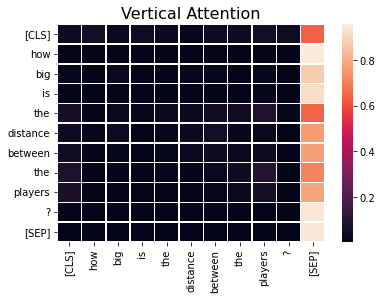

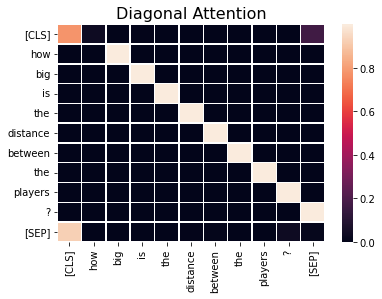

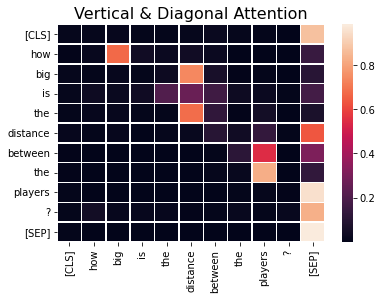

In [ ]:
!python plot_attention_map.py 

## Attention on the images
Where is the model looking into the image to answer the given question? Let's see which region is given the highest attention weight.

In [ ]:
dictionary = Dictionary.load_from_file("data/dictionary.pkl")
train_dset = VQAFeatureDataset("train", dictionary, return_bboxes=True) # 82783 images - COCO train2014
eval_dset = VQAFeatureDataset("val", dictionary, return_bboxes=True) # 40504 images - COCO val2014

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file


In [ ]:
# load trained model

model = base_model.build_baseline0_newatt(train_dset, num_hid, bidirectional=True, rnn_type="GRU").to(device) # BiGRU + double the parameters
model.w_emb.init_embedding("data/glove6b_init_300d.npy")

mapping = {"v_att.v_proj.main.0.bias":"v_att.v_proj.main.0.0.bias",
            "v_att.v_proj.main.0.weight_g":"v_att.v_proj.main.0.0.weight_g",
            "v_att.v_proj.main.0.weight_v":"v_att.v_proj.main.0.0.weight_v",
            "v_att.q_proj.main.0.bias":"v_att.q_proj.main.0.0.bias",
            "v_att.q_proj.main.0.weight_g":"v_att.q_proj.main.0.0.weight_g",
            "v_att.q_proj.main.0.weight_v":"v_att.q_proj.main.0.0.weight_v",
            "q_net.main.0.bias":"q_net.main.0.0.bias",
            "q_net.main.0.weight_g":"q_net.main.0.0.weight_g",
            "q_net.main.0.weight_v":"q_net.main.0.0.weight_v",
            "v_net.main.0.bias":"v_net.main.0.0.bias",
            "v_net.main.0.weight_g":"v_net.main.0.0.weight_g",
            "v_net.main.0.weight_v":"v_net.main.0.0.weight_v"}

state = torch.load("saved_models/BiGRU2p/model.pth")
for k in state.copy():
    if k in mapping:
        state[mapping[k]] = state.pop(k)

model.load_state_dict(state)
model.eval();

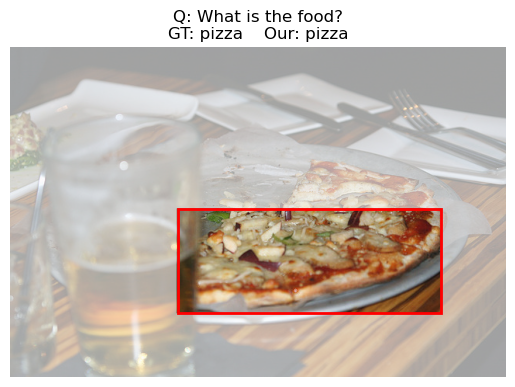

In [ ]:
random_qst = random.randint(0, len(eval_dset)-1)
attention_analysis(model, eval_dset, random_qst)

In the pizza example above, the model is answering good and focusing on the right object, but let's see some failure cases:

![](https://i.imgur.com/1ACx5Vh.png)

Here, the model can't distinguish effectively if the object is a window or a mirror, but it is still focusing it's attention on the right image patch.

![](https://i.imgur.com/njYKrjB.png)

Here, even if the model is answering well, it is mainly focusing on a part of the image that is completely uncorrelated from the question, so it's not correctly seeing the wood structure in the very background.

## Is the model able to reason?
What happens when the input question does not require simple object counting or object/material classification? Here we designed some questions on some images that require commonsense knowledge to be answered. Is the model able to reason or is it just a [stochastic parrot](https://dl.acm.org/doi/10.1145/3442188.3445922)? We also extracted the top-5 asnwers for each question and plotted their probability distribution, to check the confidence of the model and if it is coherent.

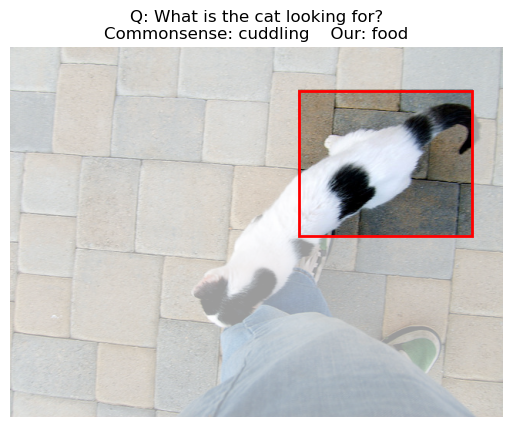

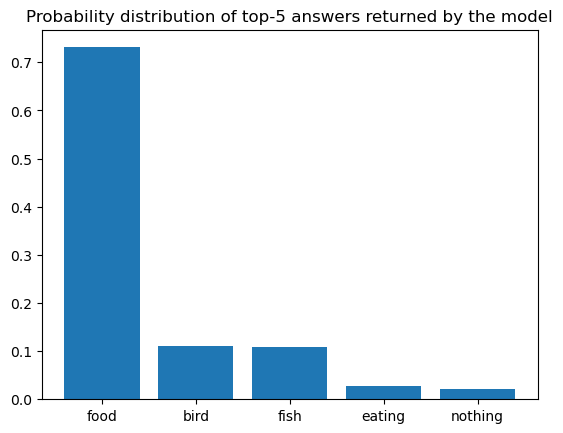

In [ ]:
img_id = 27075
q_str = "What is the cat looking for?"
expected = "cuddling"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

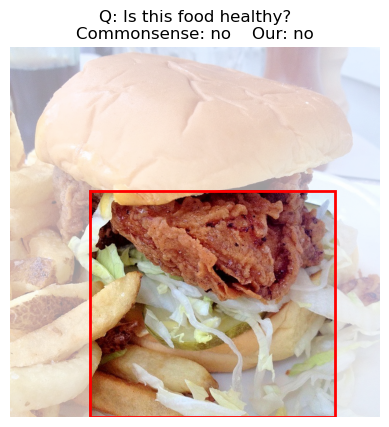

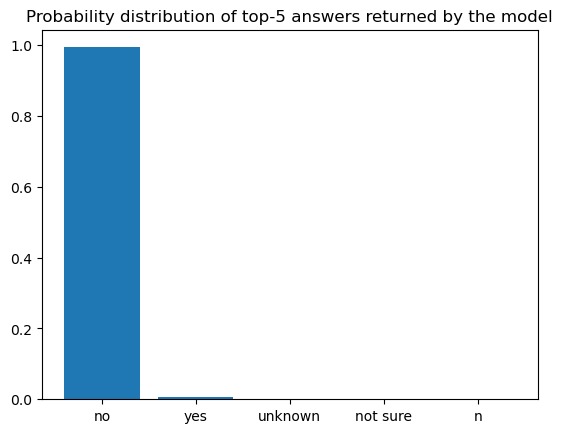

In [ ]:
img_id = 13832
q_str = "Is this food healthy?"
expected = "no"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

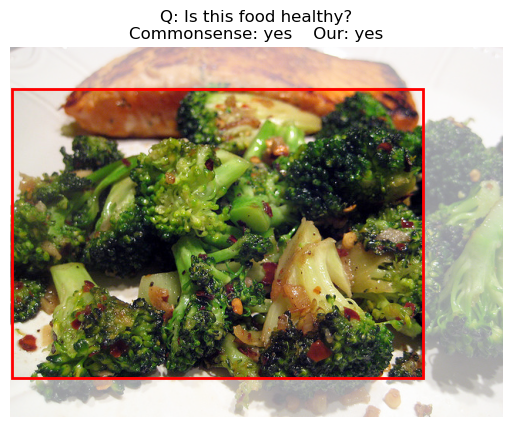

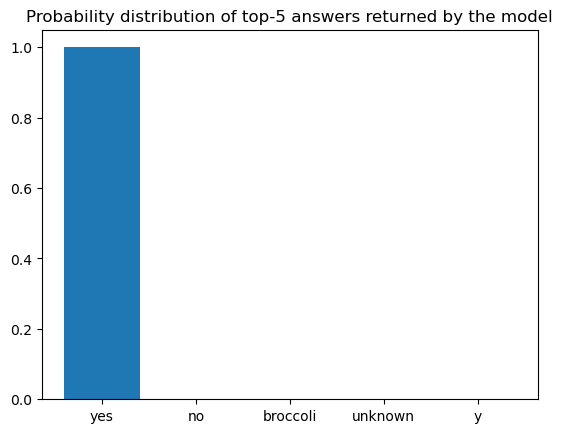

In [ ]:
img_id = 15278
q_str = "Is this food healthy?"
expected = "yes"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

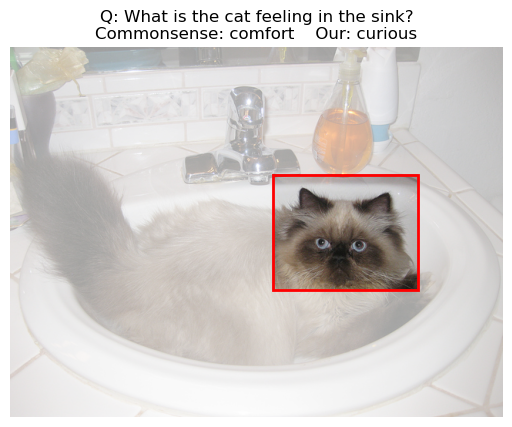

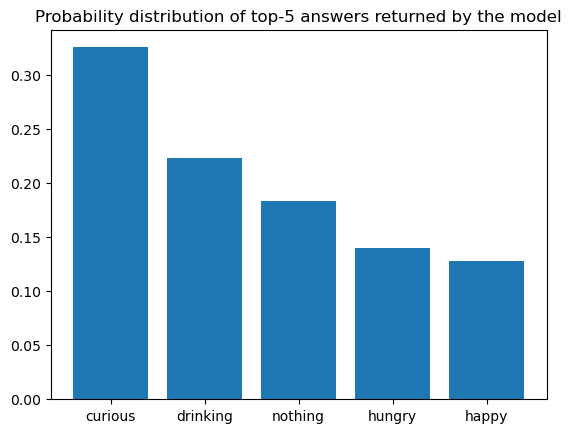

In [ ]:
img_id = 76588
q_str = "What is the cat feeling in the sink?"
expected = "comfort"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

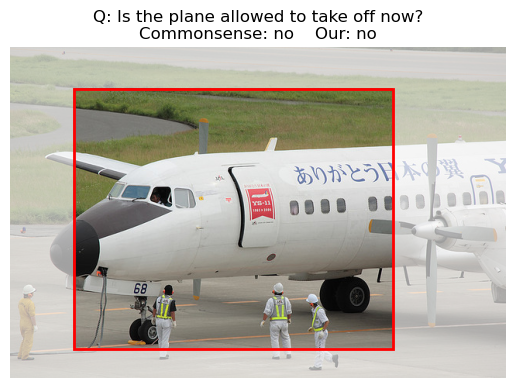

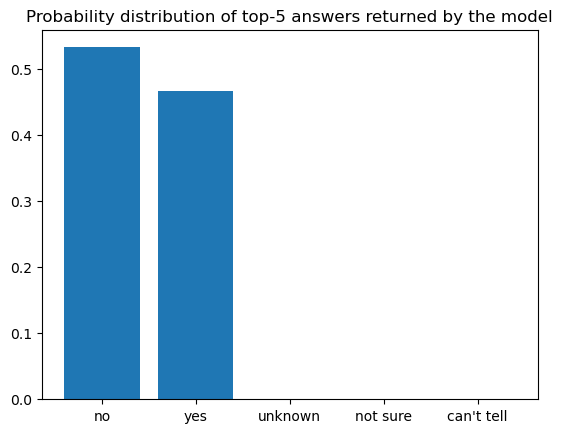

In [ ]:
img_id = 306936
q_str = "Is the plane allowed to take off now?"
expected = "no"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

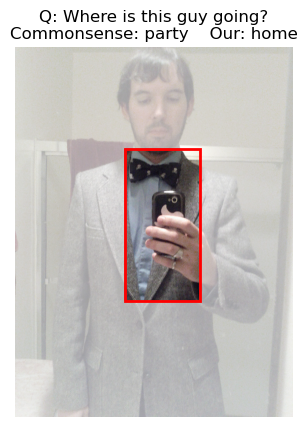

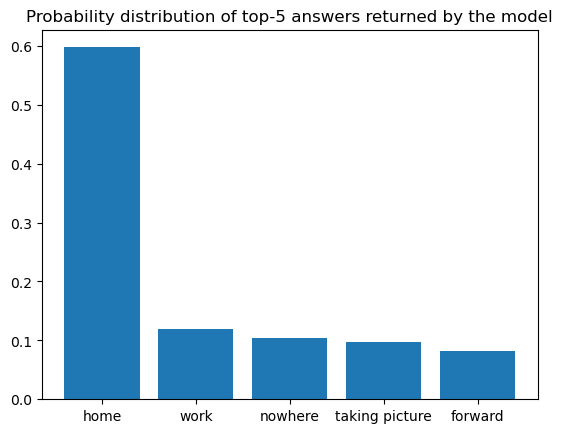

In [ ]:
img_id = 307866
q_str = "Where is this guy going?"
expected = "party"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

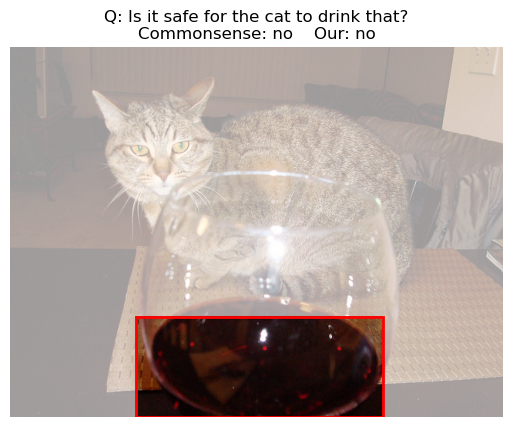

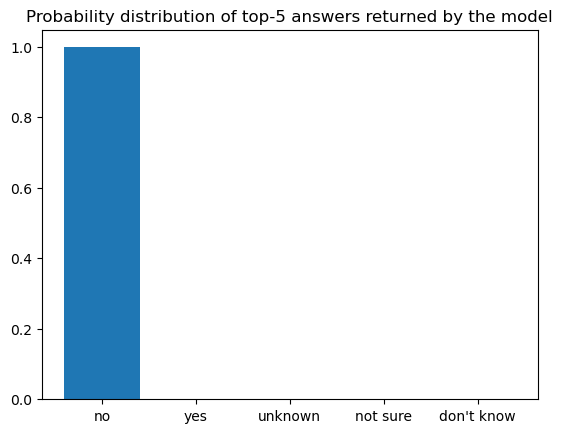

In [ ]:
img_id = 349130
q_str = "Is it safe for the cat to drink that?"
expected = "no"

reasoning_analysis(model, eval_dset, img_id, q_str, expected)

# Realiable VQA

We finally implemented the ECCV 2022 paper: **"Reliable Visual Question Answering: Abstain Rather Than Answer Incorrectly"** (available at this link: https://arxiv.org/pdf/2204.13631.pdf). 

A reliable VQA model, instead of producing errors that could mislead a user, operates by having the option to abstain
from answering if uncertain. This is possible thanks to a selective model and we decided to use the calibration (the code is available here: https://github.com/facebookresearch/reliable_vqa).


Here we report, in order:
*   The plot of the training of the reliable model (we decided then to use the checkpoint at epoch=10, because it was the best performing on the eval set);
*   The plot of the Effective Reliability metric;
*   The plot of the coverage (the percentage of questions answered by the model).

<a href="https://imgur.com/xaupDJA"><img src="https://i.imgur.com/xaupDJA.png" title="calibration"/></a>

This above is the model we implemented.

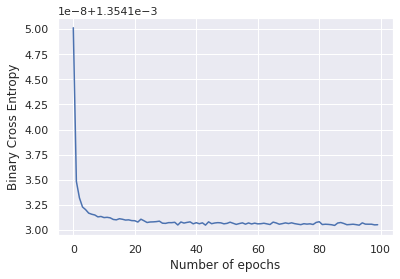

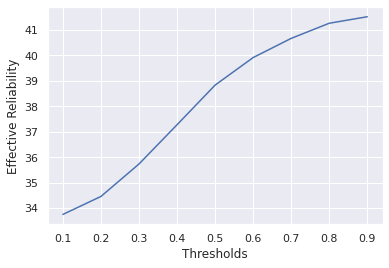

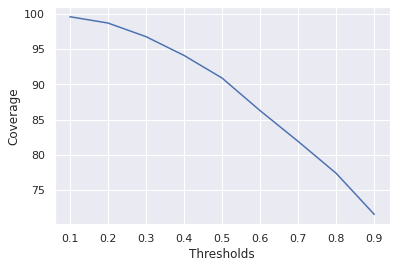

In [ ]:
!python plot_results.py

# **Model with VGG Feature Extractor**

In [ ]:
!python main.py

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Started training baseline model with lr=  0.002
Epoch:  0
epoch 0, time: 883.47
	train_loss: 14.10, score: 28.99
	eval score: 31.93 (92.66)
Epoch:  1
epoch 1, time: 806.52
	train_loss: 5.57, score: 34.11
	eval score: 37.14 (92.66)
Epoch:  2
epoch 2, time: 810.05
	train_loss: 4.95, score: 37.75
	eval score: 39.53 (92.66)
Epoch:  3
epoch 3, time: 806.27
	train_loss: 4.65, score: 39.87
	eval score: 41.40 (92.66)
Epoch:  4
epoch 4, time: 802.78
	train_loss: 4.48, score: 41.39
	eval score: 41.85 (92.66)
Epoch:  5
epoch 5, time: 799.22
	train_loss: 4.36, score: 42.69
	eval score: 42.93 (92.66)
Epoch:  6
epoch 6, time: 808.67
	train_loss: 4.27, score: 43.47
	eval score: 43.73 (92.66)
Epoch:  7
epoch 7, time: 800.63
	train_loss: 4.20, score: 44.32
	eval score: 44.00 (92.66)
Epoch:  8
epoch 8, time: 803.50
	train_loss: 4.14, score: 44.98
	eval score: 44.34 (92.66)
Epoch:  9
epoch 9, time: 804

# **Model with bidirect GRU Feature Extractor**

In [ ]:
!python main.py

loading dictionary from data/dictionary.pkl
loading features from h5 file
loading features from h5 file
Started training baseline model with lr=  0.002
Epoch:  0
epoch 0, time: 753.51
	train_loss: 12.39, score: 31.12
	eval score: 35.76 (92.66)
Epoch:  1
epoch 1, time: 753.10
	train_loss: 4.98, score: 37.36
	eval score: 39.10 (92.66)
Epoch:  2
epoch 2, time: 747.37
	train_loss: 4.60, score: 40.35
	eval score: 41.23 (92.66)
Epoch:  3
epoch 3, time: 779.32
	train_loss: 4.39, score: 42.12
	eval score: 42.75 (92.66)
Epoch:  4
epoch 4, time: 776.25
	train_loss: 4.26, score: 43.52
	eval score: 43.86 (92.66)
Epoch:  5
epoch 5, time: 793.98
	train_loss: 4.15, score: 44.66
	eval score: 44.18 (92.66)
Epoch:  6
epoch 6, time: 787.15
	train_loss: 4.06, score: 45.61
	eval score: 44.56 (92.66)
Epoch:  7
epoch 7, time: 844.11
	train_loss: 3.99, score: 46.48
	eval score: 44.92 (92.66)
Epoch:  8
epoch 8, time: 830.87
	train_loss: 3.92, score: 47.32
	eval score: 45.08 (92.66)
Epoch:  9
epoch 9, time: 814